In [ ]:
import pandas as pd

In [103]:
from tsfresh.examples.robot_execution_failures \
  import download_robot_execution_failures, load_robot_execution_failures

download_robot_execution_failures()
timeseries, y = load_robot_execution_failures()

In [104]:
display(timeseries.head())
display(y)

,id,time,F_x,F_y,F_z,T_x,T_y,T_z
0,1,0,-1,-1,63,-3,-1,0
1,1,1,0,0,62,-3,-1,0
2,1,2,-1,-1,61,-3,0,0
3,1,3,-1,-1,63,-2,-1,0
4,1,4,-1,-1,63,-3,-1,0


1      True
2      True
3      True
4      True
5      True
      ...  
84    False
85    False
86    False
87    False
88    False
Length: 88, dtype: bool

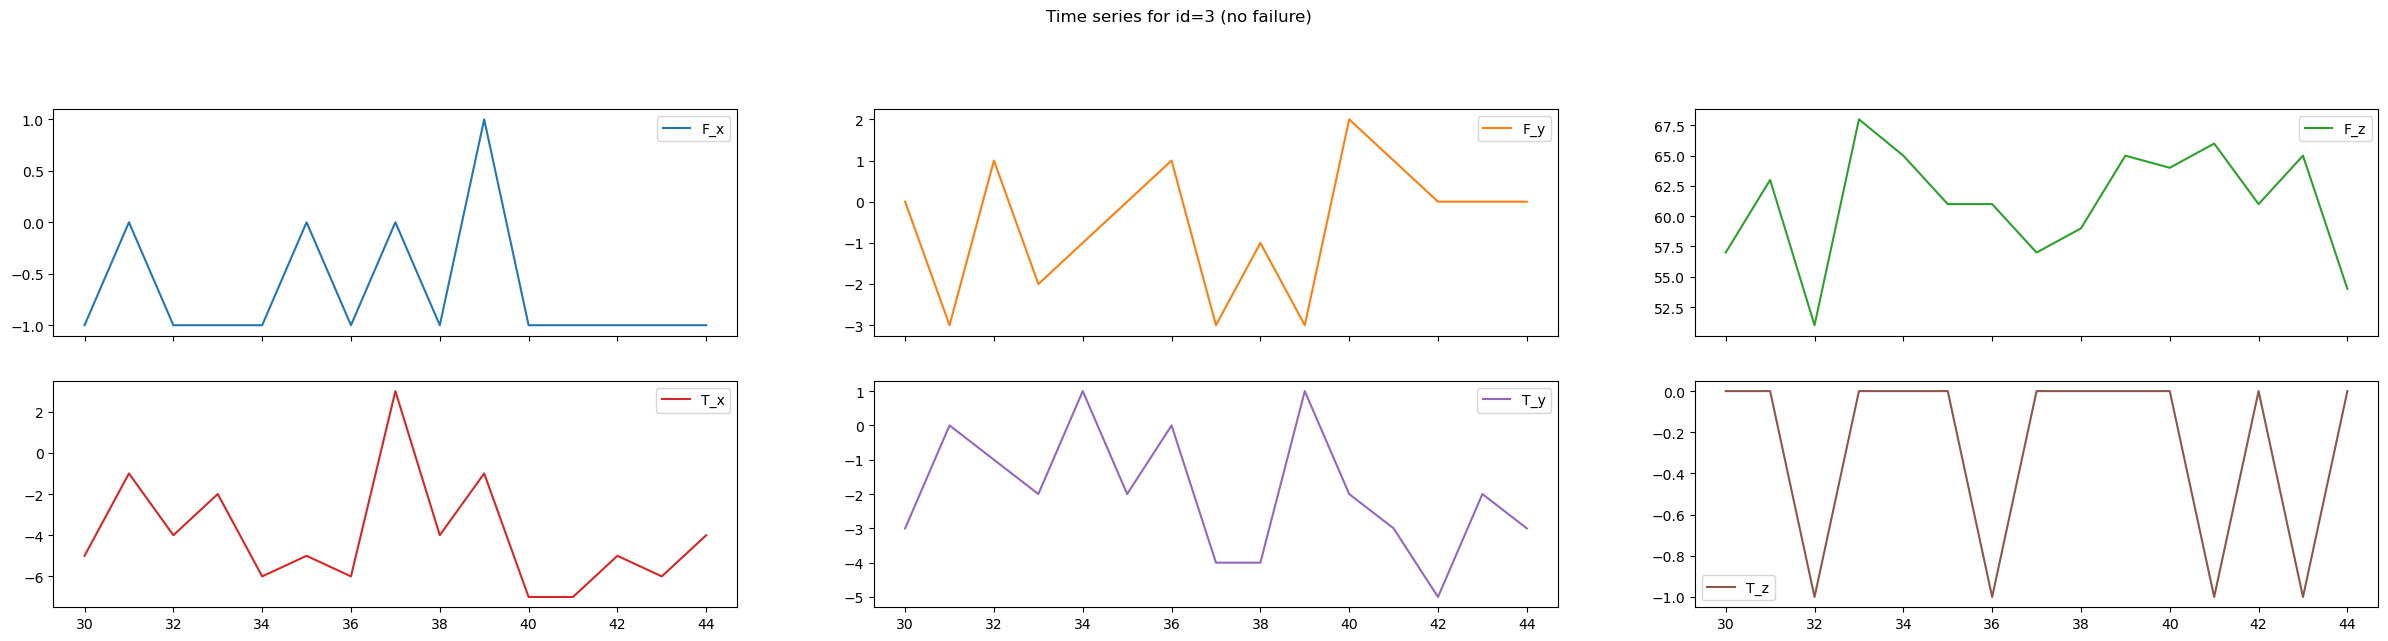

In [105]:
import matplotlib.pyplot as plt

# Exclude id and time columns
timeseries[timeseries['id'] == 3].drop(['id', 'time'], axis=1).plot(
    subplots=True, sharex=True, figsize=(30, 10),
    layout=(3, 3), title='Time series for id=3 (no failure)')
plt.show()

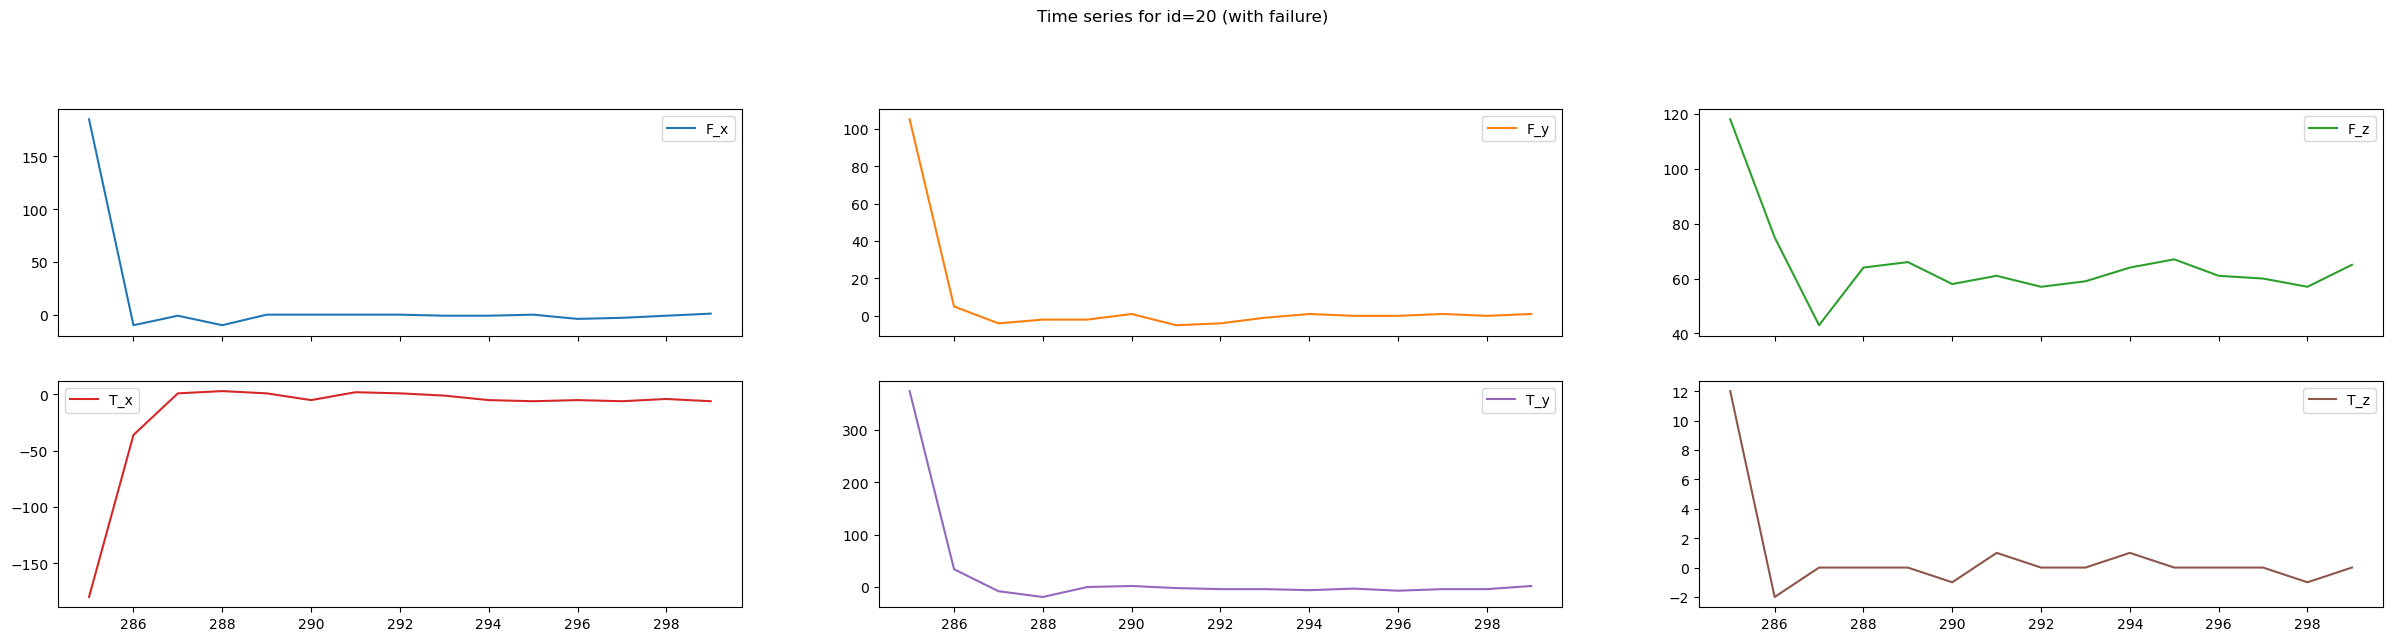

In [106]:
timeseries[timeseries['id'] == 20].drop(['id', 'time'], axis=1).plot(
    subplots=True, sharex=True, figsize=(30, 10),
    layout=(3, 3), title='Time series for id=20 (with failure)')
plt.show()

# Extract Time-Series features

In [107]:
timeseries

,id,time,F_x,F_y,F_z,T_x,T_y,T_z
0,1,0,-1,-1,63,-3,-1,0
1,1,1,0,0,62,-3,-1,0
2,1,2,-1,-1,61,-3,0,0
3,1,3,-1,-1,63,-2,-1,0
4,1,4,-1,-1,63,-3,-1,0
...,...,...,...,...,...,...,...,...
1315,88,10,-10,2,39,-21,-24,5
1316,88,11,-11,2,38,-24,-22,6
1317,88,12,-12,3,23,-24,-24,5
1318,88,13,-13,4,26,-29,-27,5


In [110]:
from tsfresh import extract_features

extracted_features = extract_features(
    timeseries, column_id='id', column_sort='time')

Feature Extraction: 100%|██████████| 20/20 [00:08<00:00,  2.40it/s]


In [111]:
extracted_features

,T_x__variance_larger_than_standard_deviation,T_x__has_duplicate_max,T_x__has_duplicate_min,T_x__has_duplicate,T_x__sum_values,T_x__abs_energy,T_x__mean_abs_change,T_x__mean_change,T_x__mean_second_derivative_central,T_x__median,...,F_z__fourier_entropy__bins_5,F_z__fourier_entropy__bins_10,F_z__fourier_entropy__bins_100,F_z__permutation_entropy__dimension_3__tau_1,F_z__permutation_entropy__dimension_4__tau_1,F_z__permutation_entropy__dimension_5__tau_1,F_z__permutation_entropy__dimension_6__tau_1,F_z__permutation_entropy__dimension_7__tau_1,F_z__query_similarity_count__query_None__threshold_0.0,F_z__mean_n_absolute_max__number_of_maxima_7
1,0.0,1.0,1.0,1.0,-43.0,125.0,0.214286,0.071429,0.038462,-3.0,...,1.213008,1.667462,2.079442,1.303876,1.698783,1.972247,2.163956,2.197225,NaN,63.428571
2,1.0,1.0,1.0,1.0,-53.0,363.0,3.785714,-0.071429,0.153846,-3.0,...,1.386294,1.732868,2.079442,1.524707,2.369382,2.397895,2.302585,2.197225,NaN,65.857143
3,1.0,0.0,1.0,1.0,-60.0,344.0,3.214286,0.071429,-0.076923,-5.0,...,1.213008,1.667462,2.079442,1.671595,2.369382,2.397895,2.302585,2.197225,NaN,65.142857
4,1.0,1.0,0.0,1.0,-93.0,763.0,3.714286,-0.428571,-0.192308,-6.0,...,1.255482,1.732868,2.079442,1.591096,1.979205,2.271869,2.302585,2.197225,NaN,65.428571
5,1.0,0.0,0.0,1.0,-105.0,849.0,4.071429,-0.357143,0.000000,-8.0,...,0.974315,1.213008,2.079442,1.332245,1.979205,2.271869,2.302585,2.197225,NaN,64.714286
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,1.0,0.0,0.0,1.0,5083.0,1825597.0,18.857143,15.285714,-0.538462,394.0,...,0.900256,0.900256,1.386294,0.898137,1.126929,1.366711,1.609438,1.831020,NaN,958.000000
85,1.0,0.0,0.0,1.0,-511.0,18023.0,2.785714,-1.214286,0.192308,-33.0,...,0.376770,0.735622,1.906155,1.265857,1.820076,1.972247,2.163956,2.197225,NaN,40.285714
86,1.0,0.0,0.0,1.0,-987.0,67981.0,3.928571,-3.500000,-0.153846,-65.0,...,0.376770,0.376770,1.073543,0.535961,0.566086,0.600166,0.639032,0.683739,NaN,255.857143
87,1.0,0.0,0.0,1.0,-1921.0,247081.0,6.642857,-0.357143,0.461538,-126.0,...,1.073543,1.073543,1.667462,0.898137,1.126929,1.366711,1.609438,1.831020,NaN,1085.714286


In [112]:
from tsfresh import select_features
from tsfresh.utilities.dataframe_functions import impute

impute(extracted_features)
features_filtered = select_features(extracted_features, y)

/opt/conda/lib/python3.10/site-packages/tsfresh/utilities/dataframe_functions.py:198: RuntimeWarning: The columns ['T_x__partial_autocorrelation__lag_7'
 'T_x__partial_autocorrelation__lag_8'
 'T_x__partial_autocorrelation__lag_9' ...
 'F_z__agg_linear_trend__attr_"stderr"__chunk_len_50__f_agg_"mean"'
 'F_z__agg_linear_trend__attr_"stderr"__chunk_len_50__f_agg_"var"'
 'F_z__query_similarity_count__query_None__threshold_0.0'] did not have any finite values. Filling with zeros.
  warnings.warn(


In [43]:
features_filtered

,F_x__value_count__value_-1,F_x__abs_energy,F_x__root_mean_square,T_y__absolute_maximum,F_x__mean_n_absolute_max__number_of_maxima_7,F_x__range_count__max_1__min_-1,F_y__abs_energy,F_y__root_mean_square,F_y__mean_n_absolute_max__number_of_maxima_7,T_y__variance,...,"F_y__cwt_coefficients__coeff_13__w_2__widths_(2, 5, 10, 20)","F_y__cwt_coefficients__coeff_14__w_5__widths_(2, 5, 10, 20)",T_y__lempel_ziv_complexity__bins_3,T_y__quantile__q_0.1,F_z__time_reversal_asymmetry_statistic__lag_1,F_x__quantile__q_0.2,F_y__quantile__q_0.7,"T_x__change_quantiles__f_agg_""var""__isabs_False__qh_0.2__ql_0.0",T_z__large_standard_deviation__r_0.35000000000000003,T_z__quantile__q_0.9
1,14.0,14.0,0.966092,1.0,1.000000,15.0,13.0,0.930949,1.000000,0.222222,...,-0.310265,-0.751682,0.400000,-1.0,-5.960000e+02,-1.0,-1.0,0.000000,0.0,0.0
2,7.0,25.0,1.290994,5.0,1.571429,13.0,76.0,2.250926,3.000000,4.222222,...,-0.202951,0.057818,0.533333,-3.6,-6.803846e+02,-1.0,-1.0,0.000000,1.0,0.0
3,11.0,12.0,0.894427,5.0,1.000000,14.0,40.0,1.632993,2.142857,3.128889,...,0.539121,0.912474,0.533333,-4.0,-6.170000e+02,-1.0,0.0,0.000000,1.0,0.0
4,5.0,16.0,1.032796,6.0,1.285714,10.0,60.0,2.000000,2.428571,7.128889,...,-2.641390,-0.609735,0.533333,-4.6,3.426308e+03,-1.0,1.0,0.000000,0.0,0.0
5,9.0,17.0,1.064581,5.0,1.285714,13.0,46.0,1.751190,2.285714,4.160000,...,0.591927,0.072771,0.466667,-5.0,-2.609000e+03,-1.0,0.8,0.000000,0.0,0.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,0.0,96833.0,80.346334,167.0,105.285714,0.0,42780.0,53.404120,71.428571,1563.528889,...,38.559593,71.641254,0.533333,36.4,-7.700628e+07,-105.0,66.8,64.000000,0.0,-1.4
85,0.0,1683.0,10.592450,14.0,13.714286,0.0,1523.0,10.076375,12.142857,14.755556,...,14.429645,16.349699,0.466667,1.0,-1.050785e+04,5.8,10.6,13.555556,0.0,-1.4
86,0.0,83497.0,74.608757,191.0,98.142857,0.0,21064.0,37.473546,47.714286,2788.595556,...,60.760842,71.095480,0.466667,19.6,-5.544922e+06,30.4,38.4,0.250000,0.0,2.8
87,0.0,1405437.0,306.097697,471.0,340.000000,0.0,308658.0,143.447551,157.285714,6415.715556,...,109.029954,173.699573,0.466667,272.6,-9.881845e+07,246.8,154.8,0.000000,0.0,43.2


In [44]:
from tsfresh import extract_relevant_features

features_filtered_direct = extract_relevant_features(timeseries, y,
                                                     column_id='id', column_sort='time')

features_filtered_direct

Feature Extraction: 100%|██████████| 20/20 [00:10<00:00,  1.95it/s]


,F_x__value_count__value_-1,F_x__root_mean_square,F_x__abs_energy,T_y__absolute_maximum,F_x__mean_n_absolute_max__number_of_maxima_7,F_x__range_count__max_1__min_-1,F_y__root_mean_square,F_y__abs_energy,F_y__mean_n_absolute_max__number_of_maxima_7,T_y__standard_deviation,...,"F_y__cwt_coefficients__coeff_14__w_5__widths_(2, 5, 10, 20)","F_y__cwt_coefficients__coeff_13__w_2__widths_(2, 5, 10, 20)",T_y__lempel_ziv_complexity__bins_3,T_y__quantile__q_0.1,F_z__time_reversal_asymmetry_statistic__lag_1,F_x__quantile__q_0.2,F_y__quantile__q_0.7,"T_x__change_quantiles__f_agg_""var""__isabs_False__qh_0.2__ql_0.0",T_z__large_standard_deviation__r_0.35000000000000003,T_z__quantile__q_0.9
1,14.0,0.966092,14.0,1.0,1.000000,15.0,0.930949,13.0,1.000000,0.471405,...,-0.751682,-0.310265,0.400000,-1.0,-5.960000e+02,-1.0,-1.0,0.000000,0.0,0.0
2,7.0,1.290994,25.0,5.0,1.571429,13.0,2.250926,76.0,3.000000,2.054805,...,0.057818,-0.202951,0.533333,-3.6,-6.803846e+02,-1.0,-1.0,0.000000,1.0,0.0
3,11.0,0.894427,12.0,5.0,1.000000,14.0,1.632993,40.0,2.142857,1.768867,...,0.912474,0.539121,0.533333,-4.0,-6.170000e+02,-1.0,0.0,0.000000,1.0,0.0
4,5.0,1.032796,16.0,6.0,1.285714,10.0,2.000000,60.0,2.428571,2.669998,...,-0.609735,-2.641390,0.533333,-4.6,3.426308e+03,-1.0,1.0,0.000000,0.0,0.0
5,9.0,1.064581,17.0,5.0,1.285714,13.0,1.751190,46.0,2.285714,2.039608,...,0.072771,0.591927,0.466667,-5.0,-2.609000e+03,-1.0,0.8,0.000000,0.0,0.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,0.0,80.346334,96833.0,167.0,105.285714,0.0,53.404120,42780.0,71.428571,39.541483,...,71.641254,38.559593,0.533333,36.4,-7.700628e+07,-105.0,66.8,64.000000,0.0,-1.4
85,0.0,10.592450,1683.0,14.0,13.714286,0.0,10.076375,1523.0,12.142857,3.841296,...,16.349699,14.429645,0.466667,1.0,-1.050785e+04,5.8,10.6,13.555556,0.0,-1.4
86,0.0,74.608757,83497.0,191.0,98.142857,0.0,37.473546,21064.0,47.714286,52.807154,...,71.095480,60.760842,0.466667,19.6,-5.544922e+06,30.4,38.4,0.250000,0.0,2.8
87,0.0,306.097697,1405437.0,471.0,340.000000,0.0,143.447551,308658.0,157.285714,80.098162,...,173.699573,109.029954,0.466667,272.6,-9.881845e+07,246.8,154.8,0.000000,0.0,43.2


# Rolling Time Series Forecast

In [97]:
import pandas as pd
df = pd.DataFrame({
   "id": [1, 1, 1, 1],
   "time": [1, 2, 3, 4],
   "x": [1, 2, 3, 4],
   "y": [5, 6, 7, 8],
})

In [98]:
df

,id,time,x,y
0,1,1,1,5
1,1,2,2,6
2,1,3,3,7
3,1,4,4,8


In [99]:
from tsfresh.utilities.dataframe_functions import roll_time_series

df_rolled = roll_time_series(df, column_id='id', column_sort='time',
                             max_timeshift=None, min_timeshift=0)

Rolling: 100%|██████████| 4/4 [00:00<00:00, 291.95it/s]


In [100]:
df_rolled

,id,time,x,y
0,"(1, 1)",1,1,5
1,"(1, 2)",1,1,5
2,"(1, 2)",2,2,6
3,"(1, 3)",1,1,5
4,"(1, 3)",2,2,6
5,"(1, 3)",3,3,7
6,"(1, 4)",1,1,5
7,"(1, 4)",2,2,6
8,"(1, 4)",3,3,7
9,"(1, 4)",4,4,8


In [101]:
from tsfresh import extract_features

# df_rolled except y
df_features = extract_features(df_rolled,
                               column_id="id", column_sort="time")

Feature Extraction: 100%|██████████| 8/8 [00:00<00:00, 51.02it/s]


In [102]:
df_features

x__variance_larger_than_standard_deviation  x__has_duplicate_max  \
1 1                                         0.0                   0.0   
  2                                         0.0                   0.0   
  3                                         0.0                   0.0   
  4                                         1.0                   0.0   

     x__has_duplicate_min  x__has_duplicate  x__sum_values  x__abs_energy  \
1 1                   0.0               0.0            1.0            1.0   
  2                   0.0               0.0            3.0            5.0   
  3                   0.0               0.0            6.0           14.0   
  4                   0.0               0.0           10.0           30.0   

     x__mean_abs_change  x__mean_change  x__mean_second_derivative_central  \
1 1                 NaN             NaN                                NaN   
  2                 1.0             1.0                                NaN   
  3                 1.0             1.0                                0.0   
  4                 1.0             1.0                                0.0   

     x__median  ...  y__fourier_entropy__bins_5  y__fourier_entropy__bins_10  \
1 1        1.0  ...                         NaN                          NaN   
  2        1.5  ...                   -0.000000                    -0.000000   
  3        2.0  ...                    0.693147                     0.693147   
  4        2.5  ...                    1.098612                     1.098612   

     y__fourier_entropy__bins_100  y__permutation_entropy__dimension_3__tau_1  \
1 1                           NaN                                         NaN   
  2                     -0.000000                                         NaN   
  3                      0.693147                                        -0.0   
  4                      1.098612                                        -0.0   

     y__permutation_entropy__dimension_4__tau_1  \
1 1                                         NaN   
  2                                         NaN   
  3                                         NaN   
  4                                        -0.0   

     y__permutation_entropy__dimension_5__tau_1  \
1 1                                         NaN   
  2                                         NaN   
  3                                         NaN   
  4                                         NaN   

     y__permutation_entropy__dimension_6__tau_1  \
1 1                                         NaN   
  2                                         NaN   
  3                                         NaN   
  4                                         NaN   

     y__permutation_entropy__dimension_7__tau_1  \
1 1                                         NaN   
  2                                         NaN   
  3                                         NaN   
  4                                         NaN   

     y__query_similarity_count__query_None__threshold_0.0  \
1 1                                                NaN      
  2                                                NaN      
  3                                                NaN      
  4                                                NaN      

     y__mean_n_absolute_max__number_of_maxima_7  
1 1                                         NaN  
  2                                         NaN  
  3                                         NaN  
  4                                         NaN  

[4 rows x 1566 columns]

In [95]:
from tsfresh import select_features
from tsfresh.utilities.dataframe_functions import impute

impute(df_features)
# features_filtered = select_features(df_features, y)

/opt/conda/lib/python3.10/site-packages/tsfresh/utilities/dataframe_functions.py:198: RuntimeWarning: The columns ['x__sample_entropy' 'x__autocorrelation__lag_4'
 'x__autocorrelation__lag_5' ...
 'y__permutation_entropy__dimension_7__tau_1'
 'y__query_similarity_count__query_None__threshold_0.0'
 'y__mean_n_absolute_max__number_of_maxima_7'] did not have any finite values. Filling with zeros.
  warnings.warn(


x__variance_larger_than_standard_deviation  x__has_duplicate_max  \
1 1                                         0.0                   0.0   
  2                                         0.0                   0.0   
  3                                         0.0                   0.0   
  4                                         1.0                   0.0   
2 8                                         0.0                   0.0   
  9                                         0.0                   0.0   

     x__has_duplicate_min  x__has_duplicate  x__sum_values  x__abs_energy  \
1 1                   0.0               0.0            1.0            1.0   
  2                   0.0               0.0            3.0            5.0   
  3                   0.0               0.0            6.0           14.0   
  4                   0.0               0.0           10.0           30.0   
2 8                   0.0               0.0           10.0          100.0   
  9                   0.0               0.0           21.0          221.0   

     x__mean_abs_change  x__mean_change  x__mean_second_derivative_central  \
1 1                 1.0             1.0                                0.0   
  2                 1.0             1.0                                0.0   
  3                 1.0             1.0                                0.0   
  4                 1.0             1.0                                0.0   
2 8                 1.0             1.0                                0.0   
  9                 1.0             1.0                                0.0   

     x__median  ...  y__fourier_entropy__bins_5  y__fourier_entropy__bins_10  \
1 1        1.0  ...                    0.346574                     0.346574   
  2        1.5  ...                   -0.000000                    -0.000000   
  3        2.0  ...                    0.693147                     0.693147   
  4        2.5  ...                    1.098612                     1.098612   
2 8       10.0  ...                    0.346574                     0.346574   
  9       10.5  ...                   -0.000000                    -0.000000   

     y__fourier_entropy__bins_100  y__permutation_entropy__dimension_3__tau_1  \
1 1                      0.346574                                         0.0   
  2                     -0.000000                                         0.0   
  3                      0.693147                                        -0.0   
  4                      1.098612                                        -0.0   
2 8                      0.346574                                         0.0   
  9                     -0.000000                                         0.0   

     y__permutation_entropy__dimension_4__tau_1  \
1 1                                         0.0   
  2                                         0.0   
  3                                         0.0   
  4                                        -0.0   
2 8                                         0.0   
  9                                         0.0   

     y__permutation_entropy__dimension_5__tau_1  \
1 1                                         0.0   
  2                                         0.0   
  3                                         0.0   
  4                                         0.0   
2 8                                         0.0   
  9                                         0.0   

     y__permutation_entropy__dimension_6__tau_1  \
1 1                                         0.0   
  2                                         0.0   
  3                                         0.0   
  4                                         0.0   
2 8                                         0.0   
  9                                         0.0   

     y__permutation_entropy__dimension_7__tau_1  \
1 1                                         0.0   
  2                                         0.0   
  3                                         0.0   